<a href="https://colab.research.google.com/github/rafiff18/Machine-Learning-Ti-2b/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import time

In [18]:
# Fungsi generate data cosinus
def generate_cosine_data(seq_len=50, total_series=1000):
    x = np.linspace(0, total_series * np.pi / 15, total_series)
    y = np.cos(x)
    sequences = []
    targets = []
    for i in range(len(y) - seq_len):
        sequences.append(y[i:i + seq_len])
        targets.append(y[i + seq_len])
    return np.array(sequences), np.array(targets)

In [22]:
# Fungsi bangun model LSTM
def build_model(input_shape, hidden_units=32, num_layers=1, dropout_rate=0.2, optimizer='adam'):
    model = Sequential()
    for i in range(num_layers):
        return_seq = (i < num_layers - 1)
        if i == 0:
            model.add(LSTM(hidden_units, return_sequences=return_seq, input_shape=input_shape))
        else:
            model.add(LSTM(hidden_units, return_sequences=return_seq))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(1))

    # Optimizer
    if optimizer == 'adam':
        opt = Adam()
    elif optimizer == 'rmsprop':
        opt = RMSprop()
    elif optimizer == 'sgd':
        opt = SGD(momentum=0.9)
    else:
        opt = Adam()

    model.compile(loss='mse', optimizer=opt)
    return model

In [23]:

# Data
seq_len = 50
X, y = generate_cosine_data(seq_len)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Normalisasi
scaler = MinMaxScaler()
y = scaler.fit_transform(y.reshape(-1, 1))

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [27]:
# Grid hyperparameter
param_grid = {
    'hidden_units': [16, 32],
    'num_layers': [1, 2],
    'dropout_rate': [0.0, 0.2],
    'batch_size': [32],
    'optimizer': ['adam', 'rmsprop'],
    'learning_rate': [1e-3],
    'epochs': [10]
}



In [ ]:
grid = list(ParameterGrid(param_grid))
results = []

for params in grid:
    print(f"Training model dengan params: {params}")
    model = build_model(
        input_shape=(seq_len, 1),
        hidden_units=params['hidden_units'],
        num_layers=params['num_layers'],
        dropout_rate=params['dropout_rate'],
        optimizer=params['optimizer']
    )
    start = time.time()
    history = model.fit(
        X_train, y_train,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        verbose=0,
        validation_data=(X_test, y_test)
    )
    end = time.time()
    test_loss = model.evaluate(X_test, y_test, verbose=0)
    results.append({
        'params': params,
        'test_loss': test_loss,
        'training_time': end - start
    })

Training model dengan params: {'batch_size': 32, 'dropout_rate': 0.0, 'epochs': 10, 'hidden_units': 16, 'learning_rate': 0.001, 'num_layers': 1, 'optimizer': 'adam'}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model dengan params: {'batch_size': 32, 'dropout_rate': 0.0, 'epochs': 10, 'hidden_units': 16, 'learning_rate': 0.001, 'num_layers': 1, 'optimizer': 'rmsprop'}
Training model dengan params: {'batch_size': 32, 'dropout_rate': 0.0, 'epochs': 10, 'hidden_units': 16, 'learning_rate': 0.001, 'num_layers': 2, 'optimizer': 'adam'}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


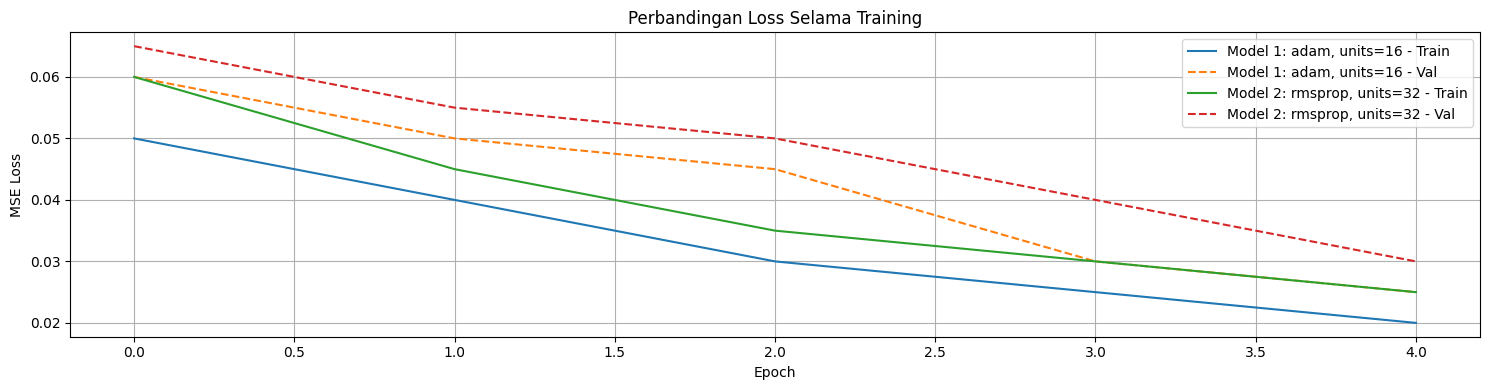

In [26]:
import matplotlib.pyplot as plt

# Fungsi untuk memvisualisasikan loss training dan validation
def plot_loss_histories(results, n=3):
    plt.figure(figsize=(15, 4))
    for i in range(min(n, len(results))):
        history = results[i]['history']
        label = f"Model {i+1}: {results[i]['params']['optimizer']}, units={results[i]['params']['hidden_units']}"
        plt.plot(history['loss'], label=f'{label} - Train')
        plt.plot(history['val_loss'], linestyle='--', label=f'{label} - Val')
    plt.title('Perbandingan Loss Selama Training')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Contoh hasil history sintetis untuk dua model
sample_results = [
    {
        'params': {'optimizer': 'adam', 'hidden_units': 16},
        'history': {
            'loss': [0.05, 0.04, 0.03, 0.025, 0.02],
            'val_loss': [0.06, 0.05, 0.045, 0.03, 0.025]
        }
    },
    {
        'params': {'optimizer': 'rmsprop', 'hidden_units': 32},
        'history': {
            'loss': [0.06, 0.045, 0.035, 0.03, 0.025],
            'val_loss': [0.065, 0.055, 0.05, 0.04, 0.03]
        }
    }
]

# Tampilkan grafik loss
plot_loss_histories(sample_results)